In [187]:
import networkx as nx
import numpy as np
import numpy.random as rand
from collections import deque

In [188]:
def generic_bfs_edges(G, source, neighbors=None, depth_limit=None, prob = 0.2):
    """Iterate over edges in a breadth-first search.

    The breadth-first search begins at `source` and enqueues the
    neighbors of newly visited nodes specified by the `neighbors`
    function.

    Parameters
    ----------
    G : NetworkX graph

    source : node
        Starting node for the breadth-first search; this function
        iterates over only those edges in the component reachable from
        this node.

    neighbors : function
        A function that takes a newly visited node of the graph as input
        and returns an *iterator* (not just a list) of nodes that are
        neighbors of that node. If not specified, this is just the
        ``G.neighbors`` method, but in general it can be any function
        that returns an iterator over some or all of the neighbors of a
        given node, in any order.

    depth_limit : int, optional(default=len(G))
        Specify the maximum search depth

    Yields
    ------
    edge
        Edges in the breadth-first search starting from `source`.

    Examples
    --------
    >>> G = nx.path_graph(3)
    >>> print(list(nx.bfs_edges(G,0)))
    [(0, 1), (1, 2)]
    >>> print(list(nx.bfs_edges(G, source=0, depth_limit=1)))
    [(0, 1)]

    Notes
    -----
    This implementation is from `PADS`_, which was in the public domain
    when it was first accessed in July, 2004.  The modifications
    to allow depth limits are based on the Wikipedia article
    "`Depth-limited-search`_".

    .. _PADS: http://www.ics.uci.edu/~eppstein/PADS/BFS.py
    .. _Depth-limited-search: https://en.wikipedia.org/wiki/Depth-limited_search
    """
    visited = {source}
    if depth_limit is None:
        depth_limit = len(G)
    queue = deque([(source, depth_limit, neighbors(source))])
    while queue:
        parent, depth_now, children = queue[0]
        try:
            child = next(children)
            p = np.random.uniform(0,1)
            if child not in visited and p < prob:
                yield parent, child
                visited.add(child)
                if depth_now > 1:
                    queue.append((child, depth_now - 1, neighbors(child)))
        except StopIteration:
            queue.popleft()


# Modifying networkx source code to add probability of edge traversal 
def bfs_edges(G, source, reverse=False, depth_limit=None, prob=0.2):
    """Iterate over edges in a breadth-first-search starting at source.

    Parameters
    ----------
    G : NetworkX graph

    source : node
       Specify starting node for breadth-first search; this function
       iterates over only those edges in the component reachable from
       this node.

    reverse : bool, optional
       If True traverse a directed graph in the reverse direction

    depth_limit : int, optional(default=len(G))
        Specify the maximum search depth

    Returns
    -------
    edges: generator
       A generator of edges in the breadth-first-search.

    Examples
    --------
    To get the edges in a breadth-first search::

        >>> G = nx.path_graph(3)
        >>> list(nx.bfs_edges(G, 0))
        [(0, 1), (1, 2)]
        >>> list(nx.bfs_edges(G, source=0, depth_limit=1))
        [(0, 1)]

    To get the nodes in a breadth-first search order::

        >>> G = nx.path_graph(3)
        >>> root = 2
        >>> edges = nx.bfs_edges(G, root)
        >>> nodes = [root] + [v for u, v in edges]
        >>> nodes
        [2, 1, 0]

    Notes
    -----
    The naming of this function is very similar to bfs_edges. The difference
    is that 'edge_bfs' yields edges even if they extend back to an already
    explored node while 'bfs_edges' yields the edges of the tree that results
    from a breadth-first-search (BFS) so no edges are reported if they extend
    to already explored nodes. That means 'edge_bfs' reports all edges while
    'bfs_edges' only report those traversed by a node-based BFS. Yet another
    description is that 'bfs_edges' reports the edges traversed during BFS
    while 'edge_bfs' reports all edges in the order they are explored.

    Based on http://www.ics.uci.edu/~eppstein/PADS/BFS.py.
    by D. Eppstein, July 2004. The modifications
    to allow depth limits based on the Wikipedia article
    "`Depth-limited-search`_".

    .. _Depth-limited-search: https://en.wikipedia.org/wiki/Depth-limited_search

    See Also
    --------
    bfs_tree
    dfs_edges
    edge_bfs

    """
    if reverse and G.is_directed():
        for i in G.predecessors:
            p = np.random.uniform(0,1)
            if p < prob: 
                successors.append(i)
    else:
        successors = G.neighbors
    # TODO In Python 3.3+, this should be `yield from ...`
    for e in generic_bfs_edges(G, source, successors, depth_limit):
        yield e

In [189]:
def getInfected(edges):
    edges = list(edges)
    nodes = []
    for i in edges:
        nodes.append(i[1])
    return nodes

In [211]:
G = nx.barabasi_albert_graph(1000, 3)

len(BFS(G, 3, 0.2))

inf 441


441

In [209]:
def BFS(Gr,zero,p): 
  
        # Mark all the vertices as not visited 
        visited = [False] * Gr.number_of_nodes()
        infected = [False] * Gr.number_of_nodes()
        k=1
  
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as  
        # visited and enqueue it 
        queue.append(zero) 
        # visited[zero] = True
        infected[zero] = True
        ret = []
  
        while queue: 
            
            # Dequeue a vertex from  
            # queue and print it 
            s = queue.pop(0) 
            ret.append(s)
  
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            for i in Gr.neighbors(s): 
                if infected[i]==False:
                    if rand.uniform(0,10) < p*10:
                        infected[i] = True
                        queue.append(i) 
                        k+=1
                                    
        #for i in range(0,len(infected)):
          #  if infected[i]==True:
          #      print(i)
        print("inf",k)       
        return ret

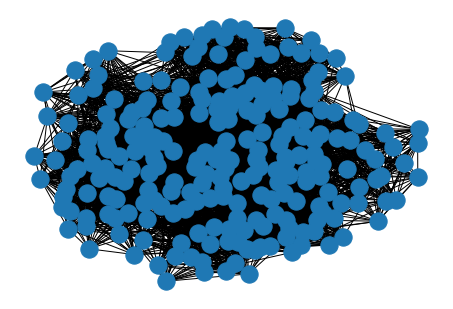

In [288]:
day1 = nx.read_gexf("sp_data_school_day_1_g.gexf_")
nx.draw_kamada_kawai(day1)

In [291]:
day1 = nx.convert_node_labels_to_integers(day1)
p0 = rand.randint(0, len(day1.nodes))
len(BFS(day1, p0, 0.05))

inf 209


209

In [ ]:
def cleanGraph(Gr):
    # takes gexf imported network as input
    # output: better indexed network,